### Total load

The dataset *TERNA_SUNSET_TOTAL_LOAD_QH* deals with the trend of the total demand in the Italian electrical system. The 'forecast' data is produced the day before the reference day based on our best prediction, taking into account all the variables that can influence the demand for electricity: from meteorological and climatic factors to socioeconomic components.

In [47]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_TOTAL_LOAD_QH" 
total_load = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
total_load = total_load.sort_values(by='ORAINI')

total_load

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ZONA,ORAINI,FLOWDATE,FLOWHOUR,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW,LOADTIME
539219,Italy,201901010000,20190101,1,24370.000,25009.000,2024-10-17 12:45:36.933
1148615,SICI,201901010000,20190101,1,1876.794,1926.005,2024-10-17 12:45:36.933
945483,SARD,201901010000,20190101,1,942.891,967.615,2024-10-17 12:45:36.933
336087,CSUD,201901010000,20190101,1,4292.272,4404.819,2024-10-17 12:45:36.933
132955,CNOR,201901010000,20190101,1,2660.928,2730.699,2024-10-17 12:45:36.933
...,...,...,...,...,...,...,...
539218,CSUD,202410162345,20241016,24,4990.446,5036.533,2024-10-17 14:19:43.913
336086,CNOR,202410162345,20241016,24,2527.648,2550.991,2024-10-17 14:19:43.913
742350,Italy,202410162345,20241016,24,30319.000,30599.000,2024-10-17 14:19:43.913
945482,NORD,202410162345,20241016,24,17218.155,17377.167,2024-10-17 14:19:43.913


In [48]:
# Filter the DataFrame for the relevant columns and rows
total_load = total_load[['ZONA', 'TOTAL_LOAD_MW', 'FORECAST_TOTAL_LOAD_MW', 'ORAINI']]
# Convert ORAINI to datetime using the correct method
total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')
total_load.set_index('ORAINI', inplace=True)

total_load.head(8)

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_9116\2034356136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')


,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2019-01-01 00:00:00,Italy,24370.000,25009.000
2019-01-01 00:00:00,SICI,1876.794,1926.005
2019-01-01 00:00:00,SARD,942.891,967.615
2019-01-01 00:00:00,CSUD,4292.272,4404.819
2019-01-01 00:00:00,CNOR,2660.928,2730.699
2019-01-01 00:00:00,SUD,2820.710,2894.671
2019-01-01 00:00:00,NORD,11776.405,12085.191
2019-01-01 00:15:00,SICI,1887.632,1933.805


In [49]:
total_load.tail(8)

,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2024-10-16 23:45:00,SARD,822.601,830.198
2024-10-16 23:45:00,SICI,1858.227,1875.388
2024-10-16 23:45:00,CALA,509.976,514.686
2024-10-16 23:45:00,CSUD,4990.446,5036.533
2024-10-16 23:45:00,CNOR,2527.648,2550.991
2024-10-16 23:45:00,Italy,30319.000,30599.000
2024-10-16 23:45:00,NORD,17218.155,17377.167
2024-10-16 23:45:00,SUD,2391.947,2414.037


In [50]:
subset_zonas = ['NORD']
mnord_load = utils.filter_load_by_zona(total_load, subset_zonas)
mnord_load = mnord_load.drop(columns=['ZONA'])
mnord_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11776.405,12085.191
2019-01-01 00:15:00,11723.369,12010.132
2019-01-01 00:30:00,11771.133,11984.692
2019-01-01 00:45:00,11740.606,11935.066
2019-01-01 01:00:00,11559.374,11825.838
...,...,...
2024-10-16 22:45:00,18786.089,18779.874
2024-10-16 23:00:00,18505.014,18526.038
2024-10-16 23:15:00,18222.625,18183.878


In [51]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
msud_load = utils.filter_load_by_zona(total_load, subset_zonas)

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
msud_load = msud_load.groupby(msud_load.index).agg(
    TOTAL_LOAD_MW=('TOTAL_LOAD_MW', 'sum'),
    FORECAST_TOTAL_LOAD_MW=('FORECAST_TOTAL_LOAD_MW', 'sum')
).reset_index()

msud_load

,ORAINI,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
0,2019-01-01 00:00:00,9932.667,10193.110
1,2019-01-01 00:15:00,9788.694,10028.134
2,2019-01-01 00:30:00,9709.883,9886.046
3,2019-01-01 00:45:00,9610.960,9770.148
4,2019-01-01 01:00:00,9472.551,9690.910
...,...,...,...
203127,2024-10-16 22:45:00,11679.222,11675.357
203128,2024-10-16 23:00:00,11361.745,11374.654
203129,2024-10-16 23:15:00,11055.843,11032.334
203130,2024-10-16 23:30:00,10762.535,10802.301


In [52]:
subset_zonas = ['ITALY', 'Italy']
italy_load = utils.filter_load_by_zona(total_load, subset_zonas)
italy_load = italy_load.drop(columns=['ZONA'])
italy_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,24370.000,25009.000
2019-01-01 00:15:00,24202.000,24794.001
2019-01-01 00:30:00,24142.000,24580.000
2019-01-01 00:45:00,23969.000,24366.001
2019-01-01 01:00:00,23599.001,24143.000
...,...,...
2024-10-16 22:45:00,33249.000,33237.999
2024-10-16 23:00:00,32567.999,32605.000
2024-10-16 23:15:00,31980.001,31912.001


### Italian total load

I will focus exclusively on the Italian case, where the macrozones Nord and Sud are expected to exhibit similar patterns.

In [53]:
print("Macro-scale descriptive stats: ITALY")
print(italy_load["TOTAL_LOAD_MW"].describe(),"\n")

Macro-scale descriptive stats: ITALY
count    203132.000000
mean      35655.904185
std        8352.032246
min       17164.000000
25%       28533.000000
50%       34960.999000
75%       42702.999000
max       59902.001000
Name: TOTAL_LOAD_MW, dtype: float64 



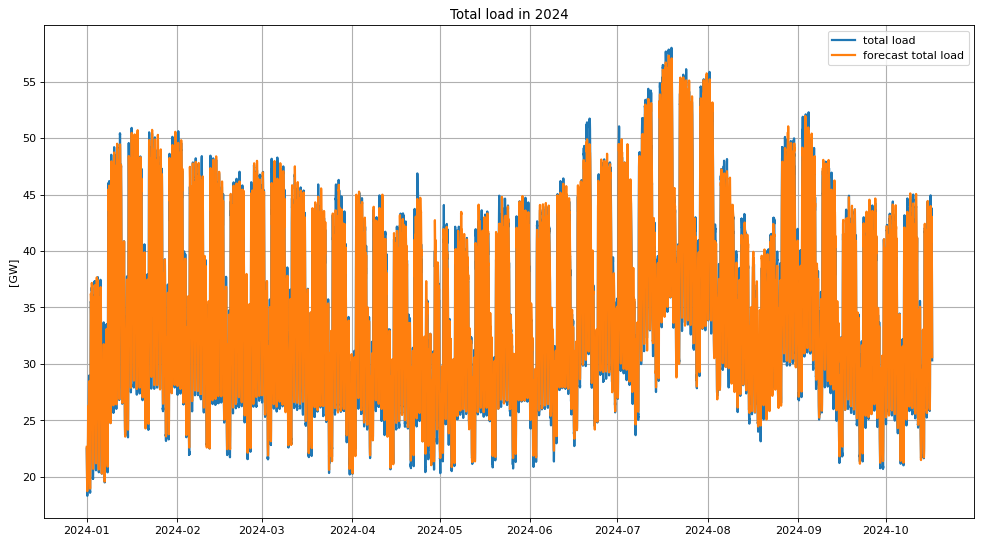

In [54]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "total load")
ax.plot(italy_load["FORECAST_TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "forecast total load")
ax.legend(loc='upper right')
ax.set_title("Total load in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

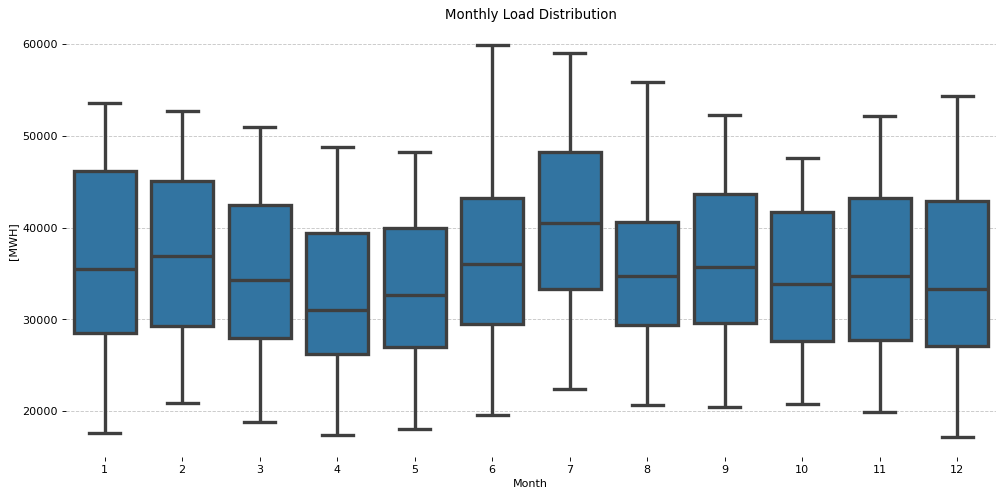

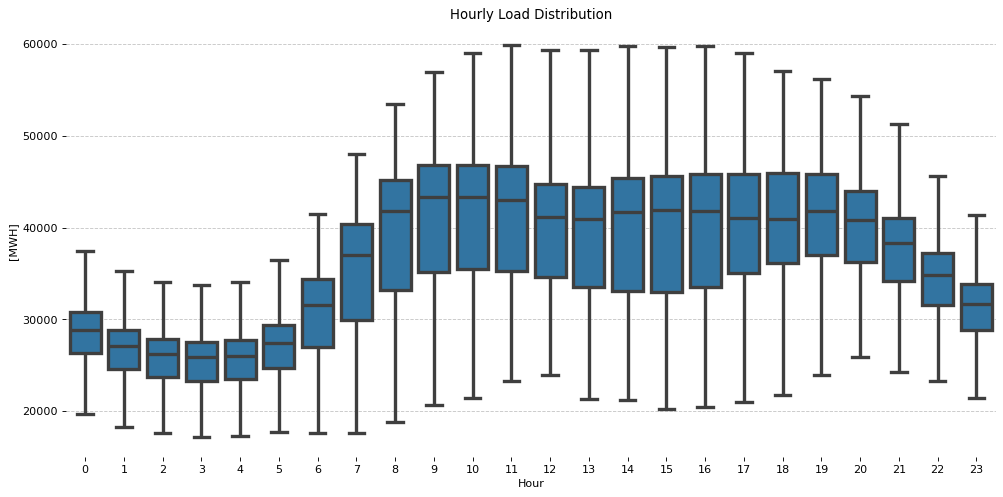

In [55]:
import seaborn as sns

italy_load_copy = italy_load.copy()
italy_load_copy.loc[:, 'hour'] = italy_load_copy.index.hour
italy_load_copy.loc[:, 'month'] = italy_load_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='month', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[MWH]")
ax.set_title("Monthly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='hour', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[MWH]")
ax.set_title("Hourly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Trends in load

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Let's check error metrics for load forecasts:
total_mae = mean_absolute_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])
total_rmse = root_mean_squared_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])

print(f"Total MAE: {total_mae:.2f}MW | Total RMSE: {total_rmse:.2f}MW")

Total MAE: 663.36MW | Total RMSE: 882.74MW


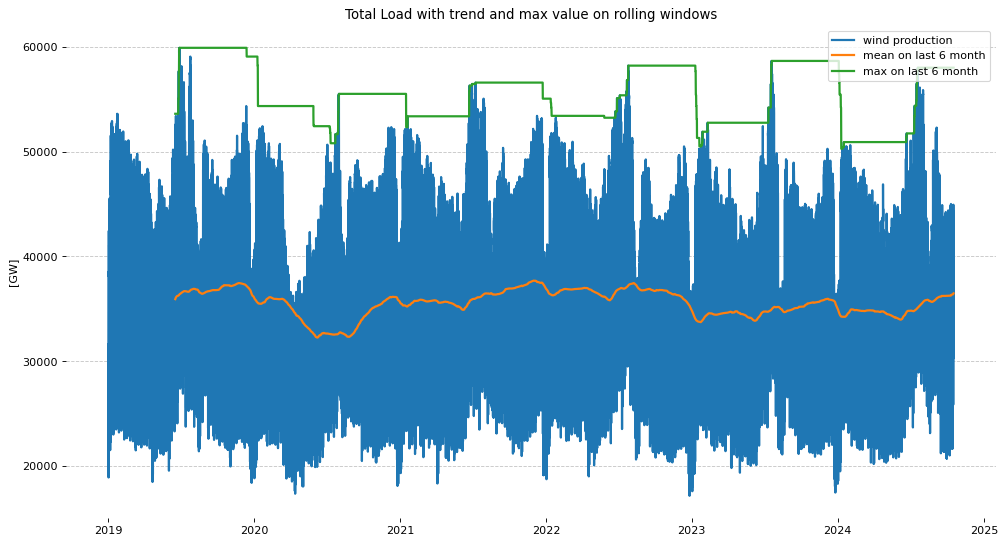

In [57]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"], linewidth=2, label = 'wind production') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Total Load with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()